## CS230 Deep Learning  | Model Baseline + VGG

Fall 2019: Sheun Aluko, Surya Narayanan, Vadim Piccini

Note: util.py defines several utilities for loading and processing raw data, ml_helpers defines ml specific functions

In [1]:
# conventional imports 
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Activation
import matplotlib.pyplot as plt
keras = tf.keras

#custom imports 
import util as u
import ml_helpers as ml 
import reloader  

# The reloader object allows reloading of source code after modifications are made 
r = reloader.Reloader(["util","ml_helpers"]) 
r.reload() 

Reloaded: util
Reloaded: ml_helpers


In [2]:
#set params
batch_size=4
num_epochs=30
data_fraction = 1
learning_rate = 0.0001 

In [3]:
#load data 
data = u.data_load(f=data_fraction) 


Loading data for term index: 8
Fraction of data that will be loaded=1

Loading train set
Removed 6 lesion(s) of 1995
On index: 100
On index: 200
On index: 300
On index: 400
On index: 500
On index: 600
On index: 700
On index: 800
On index: 900
On index: 1000
On index: 1100
On index: 1200
On index: 1300
On index: 1400
On index: 1500
On index: 1600
On index: 1700
On index: 1800
On index: 1900
Done

Loading val set
Removed 0 lesion(s) of 179
On index: 100
Done

Loading test set
Removed 1 lesion(s) of 203
On index: 100
On index: 200
Done

Train Size: 1989
Val Size: 179


In [7]:
# RUN THE MODEL 
batch_size =2 
num_epochs =  10 
result = ml.run_model(data=data,
                      batch_size=batch_size,
                      num_epochs=num_epochs,
                      learning_rate=learning_rate,
                      learning_rate_decay = False ,
                      dropout=False, 
                      save=True ,
                      multi_gpu=False,
                      model_id='vgg_co_baseline')


Using provided data


Runing model:: vVCB1989_e10_b2_lr0.0001


Fitting multi_GPU=[False] model with bs=2,epochs=10,lr=0.0001

Train on 1989 samples, validate on 179 samples
Epoch 1/10
1989/1989 [==============================] - 2731s 1s/sample - loss: 2.7705 - IoU: 0.0083 - val_loss: 0.0186 - val_IoU: 0.0052
Epoch 2/10
1989/1989 [==============================] - 2722s 1s/sample - loss: 0.0170 - IoU: 0.0122 - val_loss: 0.0179 - val_IoU: 0.0122
Epoch 3/10
1989/1989 [==============================] - 2723s 1s/sample - loss: 0.0126 - IoU: 0.0176 - val_loss: 0.0188 - val_IoU: 0.0132
Epoch 4/10
1989/1989 [==============================] - 2724s 1s/sample - loss: 0.0098 - IoU: 0.0237 - val_loss: 0.0282 - val_IoU: 0.0123
Epoch 5/10
1989/1989 [==============================] - 2724s 1s/sample - loss: 0.0083 - IoU: 0.0311 - val_loss: 0.0187 - val_IoU: 0.0078
Epoch 6/10
1989/1989 [==============================] - 2724s 1s/sample - loss: 0.0080 - IoU: 0.0349 - val_loss: 0.0172 - val_IoU: 0.00

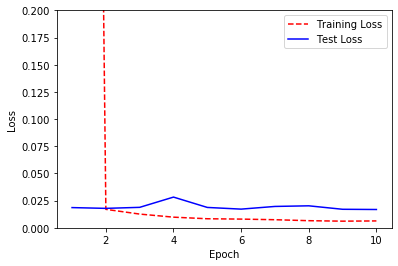

In [8]:
ml.train_curve(result['train_info'].history,name=result['name'])

{'name': 'vVCB1989_e10_b2_lr0.0001',
 'train_info': <tensorflow.python.keras.callbacks.History at 0x7fcc91044f28>,
 'time_info': {'t_start': 1575431610.0529935,
  't_end': 1575458865.5440605,
  't_elapsed': 27255.49106693268},
 'model': <tensorflow.python.keras.engine.training.Model at 0x7fcc9105bef0>}

In [11]:
result['train_info'].history

{'loss': [2.770461214809314,
  0.01696472271715931,
  0.01262115125043122,
  0.009781230709706552,
  0.008316942077125866,
  0.008001104612039803,
  0.007438166956244015,
  0.006543483458951435,
  0.0061014622311803615,
  0.006322376892535328],
 'IoU': [0.0082624415,
  0.012221866,
  0.017560162,
  0.023667153,
  0.031126687,
  0.034875747,
  0.032387417,
  0.03513529,
  0.043029536,
  0.037899703],
 'val_loss': [0.018588731754779316,
  0.017873099776161784,
  0.018813247559592128,
  0.028245554212610855,
  0.018730181076189286,
  0.01718096397088726,
  0.01964818888640437,
  0.020221351599060623,
  0.017032817471772432,
  0.016838300897734623],
 'val_IoU': [0.0052279355,
  0.012233558,
  0.013181541,
  0.012305448,
  0.007762485,
  0.007860176,
  0.014877131,
  0.008748833,
  0.00849325,
  0.015116437]}

In [6]:
np.save("models/{}_history".format(result['name']), result['train_info'].history)
np.save("models/{}_time".format(result['name']), result['time_info'])